In [ ]:
!pip install --upgrade gupload
from pydrive.auth import GoogleAuth
from google.colab import auth
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm


auth.authenticate_user()
drive.mount('/content/gdrive')

df = pd.read_csv('/content/gdrive/My Drive/final_version_with_avg_distances_and_counts.csv')
for_EDA = pd.read_csv('/content/gdrive/My Drive/FINAL_injuries_post2013.csv')
for_EDA=for_EDA.drop(['Unnamed: 0','Unnamed: 0.1','Acquired'],axis=1)

def injury_history_dur(row):
  injured_part = row['Injury Part']
  injury_history_duration = row[injured_part]
  return injury_history_duration
df['injured body part history'] = df.apply(lambda ro:injury_history_dur(ro), axis=1)
def injury_history_count(row):
  injured_part = row['Injury Part']
  injury_history_count = row[injured_part + '_count']
  return injury_history_count
df['injured body part count'] = df.apply(lambda ro:injury_history_count(ro), axis=1)
df = df[df['Acute-Chronic Workload Ratio']!= 0]

Requirement already up-to-date: gupload in /usr/local/lib/python3.7/dist-packages (1.1.0)
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Text(0.5, 1.0, 'Number of Injuries based on ACWR range')

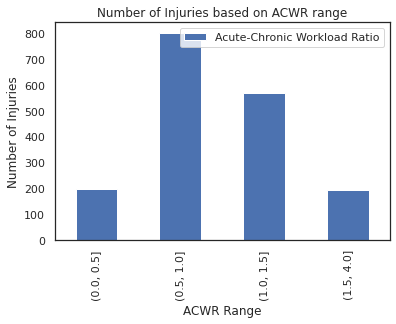

In [ ]:
bins = [0,0.5,1,1.5,4]
awcr_inj_count = pd.cut(df['Acute-Chronic Workload Ratio'],bins=bins).value_counts()
awcr_inj_count = awcr_inj_count.to_frame()
awcr_inj_count = awcr_inj_count.reset_index()
awcr_inj_count_copy = awcr_inj_count.copy()
awcr_inj_count.iloc[0],awcr_inj_count.iloc[1], awcr_inj_count.iloc[2]= awcr_inj_count_copy.iloc[2],awcr_inj_count_copy.iloc[0],awcr_inj_count_copy.iloc[1]

awcr_inj_count_plot = awcr_inj_count.plot(x = 'index', y = 'Acute-Chronic Workload Ratio', kind='bar',sort_columns=True)
awcr_inj_count_plot.set_xlabel('ACWR Range')
awcr_inj_count_plot.set_ylabel('Number of Injuries')
awcr_inj_count_plot.set_title('Number of Injuries based on ACWR range')



(0.5, 1.0]    47
(1.0, 1.5]    28
(1.5, 4.0]    17
(0.0, 0.5]    12
Name: Acute-Chronic Workload Ratio, dtype: int64
        index  Acute-Chronic Workload Ratio
0  (0.0, 0.5]                            12
1  (0.5, 1.0]                            47
2  (1.0, 1.5]                            28
3  (1.5, 4.0]                            17


Text(0.5, 1.0, 'AWCRs of Severe Injuries')

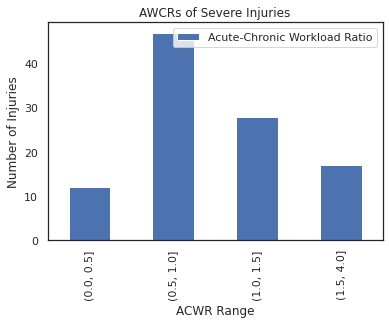

In [ ]:
for_serios_inj = df[df['Injury Duration'] >= 180]
bins = [0,0.5,1,1.5,4]
awcr_inj_count = pd.cut(for_serios_inj['Acute-Chronic Workload Ratio'],bins=bins).value_counts()
print(awcr_inj_count)
awcr_inj_count = awcr_inj_count.to_frame()
awcr_inj_count = awcr_inj_count.reset_index()
awcr_inj_count_copy = awcr_inj_count.copy()
awcr_inj_count.iloc[0],awcr_inj_count.iloc[1], awcr_inj_count.iloc[2],awcr_inj_count.iloc[3]= awcr_inj_count_copy.iloc[3],awcr_inj_count_copy.iloc[0],awcr_inj_count_copy.iloc[1],awcr_inj_count_copy.iloc[2]
print(awcr_inj_count)

awcr_inj_count_plot = awcr_inj_count.plot(x = 'index', y = 'Acute-Chronic Workload Ratio', kind='bar',sort_columns=True)
awcr_inj_count_plot.set_xlabel('ACWR Range')
awcr_inj_count_plot.set_ylabel('Number of Injuries')
awcr_inj_count_plot.set_title('AWCRs of Severe Injuries')



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


range
(0.0, 0.5]    28.877551
(0.5, 1]      31.630137
(1, 1.5]      24.038664
(1.5, 4]      39.760417
Name: Injury Duration, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
0.04614293716167594


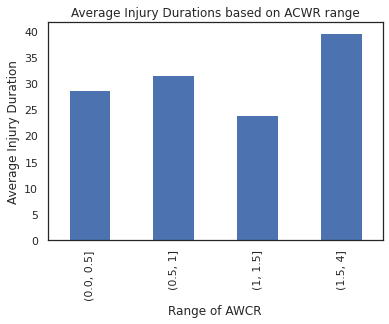

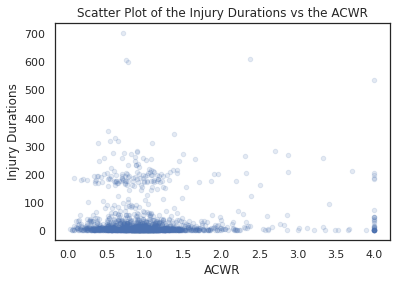

In [ ]:
def get_range(row):
  awcr = row['Acute-Chronic Workload Ratio']
  mask1 = awcr<=0.5
  mask2 = awcr <=1
  mask3 = awcr <= 1.5
  mask4 = awcr>1.5
  if mask1:
    return '(0.0, 0.5]'
  elif (not mask1) and mask2:
    return '(0.5, 1]'
  elif (not mask2) and mask3:
    return '(1, 1.5]'
  elif mask4:
    return '(1.5, 4]'
df_copy = df.copy()
df_copy['range'] = df_copy.apply(lambda ro: get_range(ro), axis=1)
awcr_inj_duration = df_copy.groupby(['range'])['Injury Duration'].mean()
print(awcr_inj_duration)
awcr_inj_duration_plot = awcr_inj_duration.plot(kind='bar')
awcr_inj_duration_plot.set_xlabel('Range of AWCR')
awcr_inj_duration_plot.set_ylabel('Average Injury Duration')
awcr_inj_duration_plot.set_title('Average Injury Durations based on ACWR range')

print(awcr_inj_duration_plot)

scatter_acwr = df.plot(x = 'Acute-Chronic Workload Ratio', y = 'Injury Duration',kind='scatter', alpha=0.15)
scatter_acwr.set_title('Scatter Plot of the Injury Durations vs the ACWR')
scatter_acwr.set_xlabel('ACWR')
scatter_acwr.set_ylabel('Injury Durations')

print(scatter_acwr)
print(df['Injury Duration'].corr(df['Acute-Chronic Workload Ratio']))


AxesSubplot(0.125,0.125;0.775x0.755)


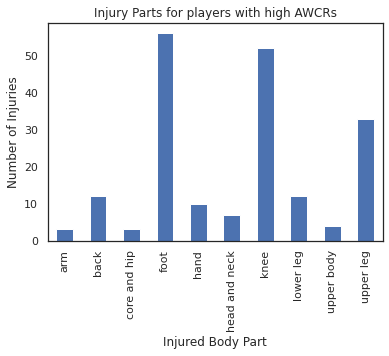

In [ ]:
for_high_awcr = df[df['Acute-Chronic Workload Ratio'] > 1.5]

for_high_awcr = for_high_awcr.groupby(['Injury Part']).size()
for_high_awcr_plot = for_high_awcr.plot(kind='bar')
for_high_awcr_plot.set_xlabel('Injured Body Part')
for_high_awcr_plot.set_ylabel('Number of Injuries')
for_high_awcr_plot.set_title('Injury Parts for players with high AWCRs')
print(for_high_awcr_plot)

AxesSubplot(0.125,0.125;0.775x0.755)


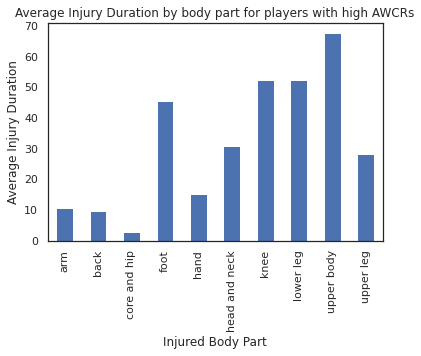

In [ ]:
for_high_awcr = df[df['Acute-Chronic Workload Ratio'] > 1.5]

for_high_awcr = for_high_awcr.groupby(['Injury Part'])['Injury Duration'].mean()
for_high_awcr_plot = for_high_awcr.plot(kind='bar')
for_high_awcr_plot.set_xlabel('Injured Body Part')
for_high_awcr_plot.set_ylabel('Average Injury Duration')
for_high_awcr_plot.set_title('Average Injury Duration by body part for players with high AWCRs')
print(for_high_awcr_plot)

AxesSubplot(0.125,0.125;0.775x0.755)


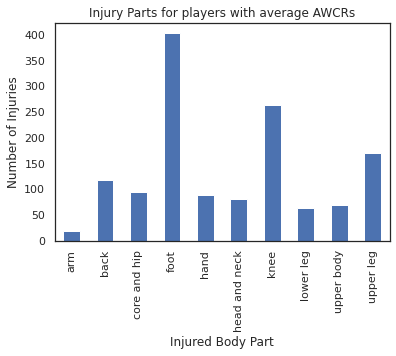

In [ ]:
for_avg_awcr = df[df['Acute-Chronic Workload Ratio'] >= 0.5]
for_avg_awcr=for_avg_awcr[for_avg_awcr['Acute-Chronic Workload Ratio']<=1.5]

for_avg_awcr = for_avg_awcr.groupby(['Injury Part']).size()
for_avg_awcr_plot = for_avg_awcr.plot(kind='bar')
for_avg_awcr_plot.set_xlabel('Injured Body Part')
for_avg_awcr_plot.set_ylabel('Number of Injuries')
for_avg_awcr_plot.set_title('Injury Parts for players with average AWCRs')
print(for_avg_awcr_plot)


AxesSubplot(0.125,0.125;0.775x0.755)


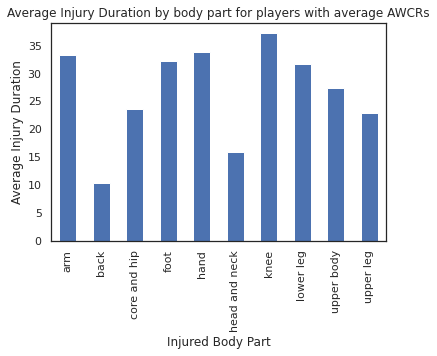

In [ ]:
for_avg_awcr = df[df['Acute-Chronic Workload Ratio'] >= 0.5]
for_avg_awcr=for_avg_awcr[for_avg_awcr['Acute-Chronic Workload Ratio']<=1.5]

for_avg_awcr = for_avg_awcr.groupby(['Injury Part'])['Injury Duration'].mean()
for_avg_awcr_plot = for_avg_awcr.plot(kind='bar')
for_avg_awcr_plot.set_xlabel('Injured Body Part')
for_avg_awcr_plot.set_ylabel('Average Injury Duration')
for_avg_awcr_plot.set_title('Average Injury Duration by body part for players with average AWCRs')
print(for_avg_awcr_plot)

AxesSubplot(0.125,0.125;0.775x0.755)


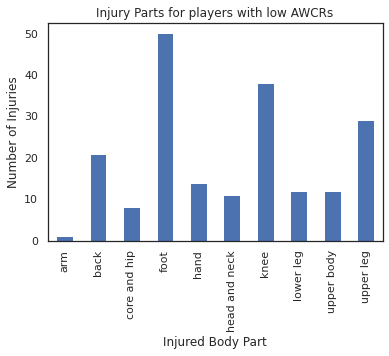

In [ ]:
for_low_awcr = df[df['Acute-Chronic Workload Ratio'] < 0.5]

for_low_awcr = for_low_awcr.groupby(['Injury Part']).size()
for_low_awcr_plot = for_low_awcr.plot(kind='bar')
for_low_awcr_plot.set_xlabel('Injured Body Part')
for_low_awcr_plot.set_ylabel('Number of Injuries')
for_low_awcr_plot.set_title('Injury Parts for players with low AWCRs')
print(for_low_awcr_plot)



AxesSubplot(0.125,0.125;0.775x0.755)


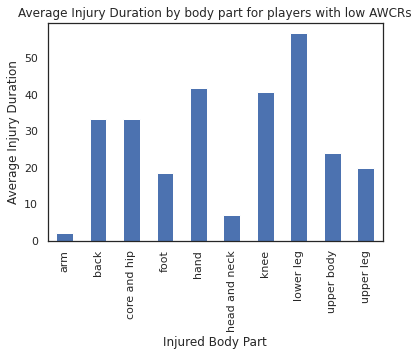

In [ ]:
for_low_awcr = df[df['Acute-Chronic Workload Ratio'] < 0.5]

for_low_awcr = for_low_awcr.groupby(['Injury Part'])['Injury Duration'].mean()
for_low_awcr_plot = for_low_awcr.plot(kind='bar')
for_low_awcr_plot.set_xlabel('Injured Body Part')
for_low_awcr_plot.set_ylabel('Average Injury Duration')
for_low_awcr_plot.set_title('Average Injury Duration by body part for players with low AWCRs')
print(for_low_awcr_plot)

In [ ]:
for_low_awcr = df[df['Acute-Chronic Workload Ratio'] < 0.5]
for_high_awcr = df_copy[df_copy['Acute-Chronic Workload Ratio'] > 1.5]
for_avg_awcr = df_copy[df_copy['Acute-Chronic Workload Ratio'] >= 0.5]
for_avg_awcr=for_avg_awcr[for_avg_awcr['Acute-Chronic Workload Ratio']<=1.5]

for_avg_awcr_avg = for_avg_awcr['injured body part history'].mean()
for_low_awcr_avg = for_low_awcr['injured body part history'].mean()
for_high_awcr_avg = for_high_awcr['injured body part history'].mean()
print(for_low_awcr_avg)
print(for_avg_awcr_avg)
print(for_high_awcr_avg)

for_low_awcr_avg = for_low_awcr['injured body part count'].mean()
for_avg_awcr_avg = for_avg_awcr['injured body part count'].mean()
for_high_awcr_avg = for_high_awcr['injured body part count'].mean()
print(for_low_awcr_avg)
print(for_avg_awcr_avg)
print(for_high_awcr_avg)
print(for_avg_awcr)


24.979591836734695
29.60276967930029
35.322916666666664
1.989795918367347
2.0823615160349855
1.984375
      Unnamed: 0        Date  ... injured body part count     range
0              0  2013-11-12  ...                       2  (0.5, 1]
1              1  2013-11-12  ...                       0  (0.5, 1]
3              3  2013-11-15  ...                       3  (0.5, 1]
5              5  2013-11-16  ...                       1  (1, 1.5]
6              6  2013-11-16  ...                       0  (0.5, 1]
...          ...         ...  ...                     ...       ...
1793        1793  2019-04-20  ...                       3  (0.5, 1]
1795        1795  2019-04-27  ...                       2  (0.5, 1]
1798        1798  2019-05-10  ...                       2  (1, 1.5]
1799        1799  2019-05-20  ...                       3  (0.5, 1]
1800        1800  2019-06-05  ...                       1  (0.5, 1]

[1372 rows x 35 columns]


AxesSubplot(0.125,0.125;0.775x0.755)


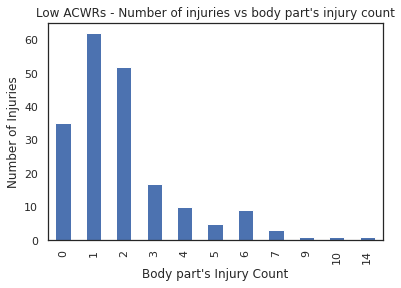

In [ ]:
for_low_awcr = for_low_awcr.groupby(['injured body part count']).size()
for_low_awcr_plot = for_low_awcr.plot(kind='bar')
for_low_awcr_plot.set_xlabel('''Body part's Injury Count''')
for_low_awcr_plot.set_ylabel('Number of Injuries')
for_low_awcr_plot.set_title('''Low ACWRs - Number of injuries vs body part's injury count''')

print(for_low_awcr_plot)


AxesSubplot(0.125,0.125;0.775x0.755)


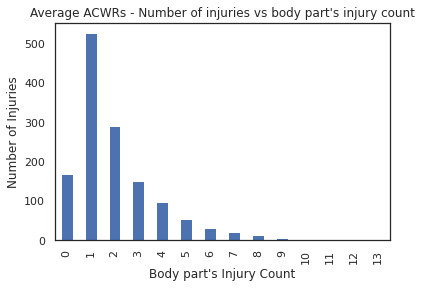

In [ ]:
for_avg_awcr = for_avg_awcr.groupby(['injured body part count']).size()
for_avg_awcr_plot = for_avg_awcr.plot(kind='bar')
for_avg_awcr_plot.set_xlabel('''Body part's Injury Count''')
for_avg_awcr_plot.set_ylabel('Number of Injuries')
for_avg_awcr_plot.set_title('''Average ACWRs - Number of injuries vs body part's injury count''')

print(for_avg_awcr_plot)


AxesSubplot(0.125,0.125;0.775x0.755)


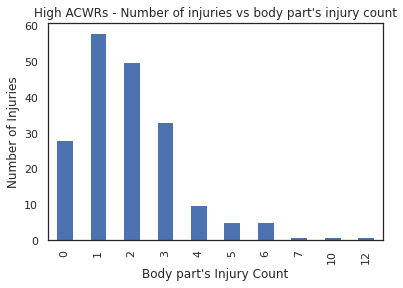

In [ ]:
for_high_awcr = for_high_awcr.groupby(['injured body part count']).size()
for_high_awcr_plot = for_high_awcr.plot(kind='bar')
for_high_awcr_plot.set_xlabel('''Body part's Injury Count''')
for_high_awcr_plot.set_ylabel('Number of Injuries')
for_high_awcr_plot.set_title('''High ACWRs - Number of injuries vs body part's injury count''')


print(for_high_awcr_plot)


In [ ]:
def get_range(row):
  awcr = row['injured body part history']
  mask1 = awcr<=28
  mask2 = awcr <=90
  mask3 = awcr <= 180
  mask4 = awcr>180
  if mask1:
    return '(0, 28]'
  elif (not mask1) and mask2:
    return '(28, 90]'
  elif (not mask2) and mask3:
    return '(90, 180]'
  elif mask4:
    return '(180, inf]'
df_copy = df.copy()
df_copy['range inj duration'] = df_copy.apply(lambda ro: get_range(ro), axis=1)

for_low_awcr = df_copy[df_copy['Acute-Chronic Workload Ratio'] < 0.5]
for_high_awcr = df_copy[df_copy['Acute-Chronic Workload Ratio'] > 1.5]
for_avg_awcr = df_copy[df_copy['Acute-Chronic Workload Ratio'] >= 0.5]
for_avg_awcr=for_avg_awcr[for_avg_awcr['Acute-Chronic Workload Ratio']<=1.5]

AxesSubplot(0.125,0.125;0.775x0.755)


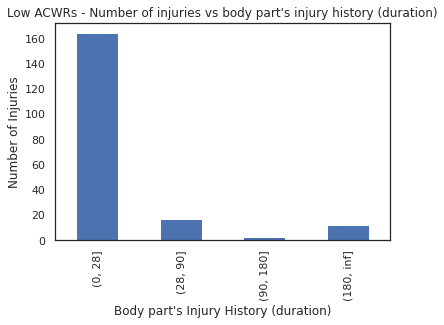

In [ ]:
for_low_awcr = for_low_awcr.groupby(['range inj duration']).size()
for_low_awcr = for_low_awcr.to_frame()
for_low_awcr = for_low_awcr.reset_index()
for_low_awcr_copy = for_low_awcr.copy()
for_low_awcr.iloc[1],for_low_awcr.iloc[2],for_low_awcr.iloc[3] = for_low_awcr_copy.iloc[2],for_low_awcr_copy.iloc[3],for_low_awcr_copy.iloc[1]

for_low_awcr_plot = for_low_awcr.plot(x = 'range inj duration', y = 0,kind='bar',legend=False)

for_low_awcr_plot.set_xlabel('''Body part's Injury History (duration)''')
for_low_awcr_plot.set_ylabel('Number of Injuries')
for_low_awcr_plot.set_title('''Low ACWRs - Number of injuries vs body part's injury history (duration)''')

print(for_low_awcr_plot)

#HERE

AxesSubplot(0.125,0.125;0.775x0.755)


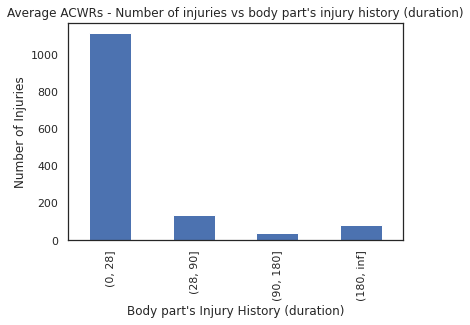

In [ ]:
for_avg_awcr = for_avg_awcr.groupby(['range inj duration']).size()
for_avg_awcr = for_avg_awcr.to_frame()
for_avg_awcr = for_avg_awcr.reset_index()


for_avg_awcr_copy = for_avg_awcr.copy()
for_avg_awcr.iloc[1],for_avg_awcr.iloc[2],for_avg_awcr.iloc[3] = for_avg_awcr_copy.iloc[2],for_avg_awcr_copy.iloc[3],for_avg_awcr_copy.iloc[1]



for_avg_awcr_plot = for_avg_awcr.plot(x = 'range inj duration', y = 0,kind='bar',legend=False)
for_avg_awcr_plot.set_xlabel('''Body part's Injury History (duration)''')
for_avg_awcr_plot.set_ylabel('Number of Injuries')
for_avg_awcr_plot.set_title('''Average ACWRs - Number of injuries vs body part's injury history (duration)''')

print(for_avg_awcr_plot)


Text(0.5, 1.0, "High ACWRs - Number of injuries vs body part's injury history (duration)")

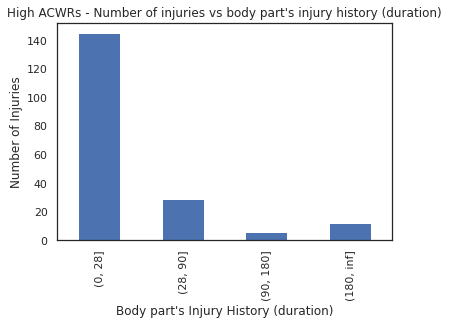

In [ ]:
for_high_awcr = for_high_awcr.groupby(['range inj duration']).size()
for_high_awcr = for_high_awcr.to_frame()
for_high_awcr = for_high_awcr.reset_index()
for_high_awcr_copy = for_high_awcr.copy()
for_high_awcr.iloc[1],for_high_awcr.iloc[2],for_high_awcr.iloc[3] = for_high_awcr_copy.iloc[2],for_high_awcr_copy.iloc[3],for_high_awcr_copy.iloc[1]


for_high_awcr_plot = for_high_awcr.plot(x = 'range inj duration', y = 0,kind='bar',legend=False)

for_high_awcr_plot.set_xlabel('''Body part's Injury History (duration)''')
for_high_awcr_plot.set_ylabel('Number of Injuries')
for_high_awcr_plot.set_title('''High ACWRs - Number of injuries vs body part's injury history (duration)''')

#HERE

Injury Part
arm              1.028085
back             0.992268
core and hip     0.926896
foot             1.018795
hand             0.997394
head and neck    1.042604
knee             1.124068
lower leg        1.071020
upper body       0.895137
upper leg        1.095351
Name: Acute-Chronic Workload Ratio, dtype: float64


Text(0.5, 1.0, 'Average ACWR vs Injured Body Part')

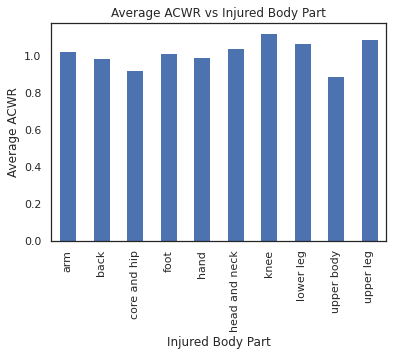

In [ ]:
AWCR_by_injury_part = df_copy.groupby(['Injury Part'])['Acute-Chronic Workload Ratio'].mean()
print(AWCR_by_injury_part)
AWCR_by_injury_part_plot = AWCR_by_injury_part.plot(kind='bar')
AWCR_by_injury_part_plot.set_xlabel('Injured Body Part')
AWCR_by_injury_part_plot.set_ylabel('Average ACWR')
AWCR_by_injury_part_plot.set_title('Average ACWR vs Injured Body Part')



Text(0.5, 1.0, 'Injury Severity vs Average ACWR')

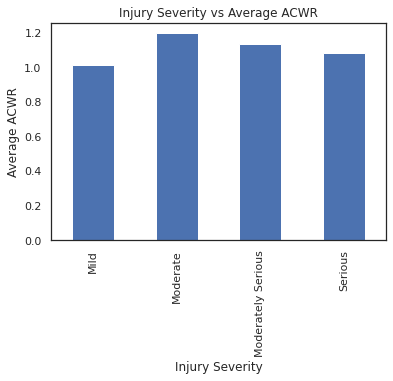

In [ ]:
def get_range(row):
  awcr = row['injured body part history']
  mask1 = awcr<=28
  mask2 = awcr <=90
  mask3 = awcr <= 180
  mask4 = awcr>180
  if mask1:
    return 'Mild'
  elif (not mask1) and mask2:
    return 'Moderate'
  elif (not mask2) and mask3:
    return 'Moderately Serious'
  elif mask4:
    return 'Serious'
df_copy = df.copy()
df_copy['range inj duration'] = df_copy.apply(lambda ro: get_range(ro), axis=1)
injury_severity_vs_acwr = df_copy.groupby(['range inj duration'])['Acute-Chronic Workload Ratio'].mean()
injury_severity_vs_acwr_plot = injury_severity_vs_acwr.plot(kind='bar')
injury_severity_vs_acwr_plot.set_xlabel('Injury Severity')
injury_severity_vs_acwr_plot.set_ylabel('Average ACWR')
injury_severity_vs_acwr_plot.set_title('Injury Severity vs Average ACWR')



Text(0.5, 1.0, 'Injury Duration by body part for Low ACWRs')

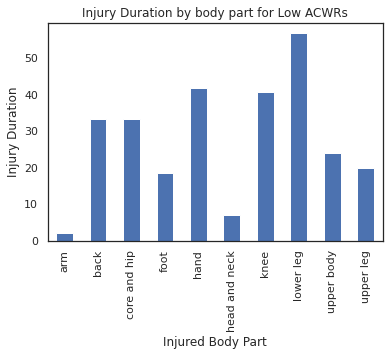

In [ ]:
df_copy = df.copy()
for_low_awcr = df_copy[df_copy['Acute-Chronic Workload Ratio'] < 0.5]
for_high_awcr = df_copy[df_copy['Acute-Chronic Workload Ratio'] > 1.5]
for_avg_awcr = df_copy[df_copy['Acute-Chronic Workload Ratio'] >= 0.5]
for_avg_awcr=for_avg_awcr[for_avg_awcr['Acute-Chronic Workload Ratio']<=1.5]

for_low_awcr = for_low_awcr.groupby(['Injury Part'])['Injury Duration'].mean()
for_avg_awcr = for_avg_awcr.groupby(['Injury Part'])['Injury Duration'].mean()
for_high_awcr = for_high_awcr.groupby(['Injury Part'])['Injury Duration'].mean()
plt.rcParams["figure.figsize"] = (6,4)

for_low_awcr_plot = for_low_awcr.plot(kind='bar')
for_low_awcr_plot.set_xlabel('Injured Body Part')
for_low_awcr_plot.set_ylabel('Injury Duration')
for_low_awcr_plot.set_title('Injury Duration by body part for Low ACWRs')


Text(0.5, 1.0, 'Injury Duration by body part for Average ACWRs')

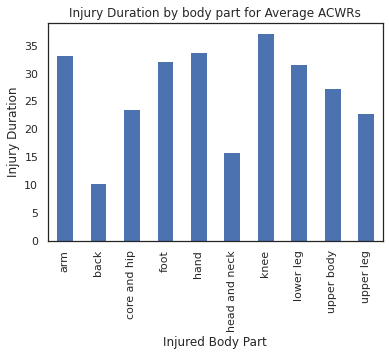

In [ ]:
for_avg_awcr_plot = for_avg_awcr.plot(kind='bar')
for_avg_awcr_plot.set_xlabel('Injured Body Part')
for_avg_awcr_plot.set_ylabel('Injury Duration')
for_avg_awcr_plot.set_title('Injury Duration by body part for Average ACWRs')


Text(0.5, 1.0, 'Injury Duration by body part for High ACWRs')

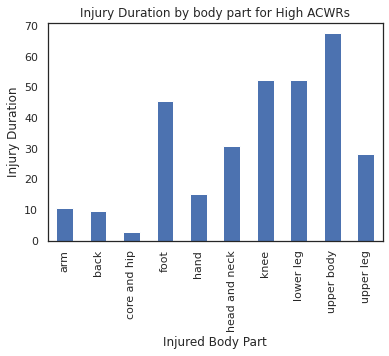

In [ ]:
for_high_awcr_plot = for_high_awcr.plot(kind='bar')
for_high_awcr_plot.set_xlabel('Injured Body Part')
for_high_awcr_plot.set_ylabel('Injury Duration')
for_high_awcr_plot.set_title('Injury Duration by body part for High ACWRs')


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0.07302327642425532


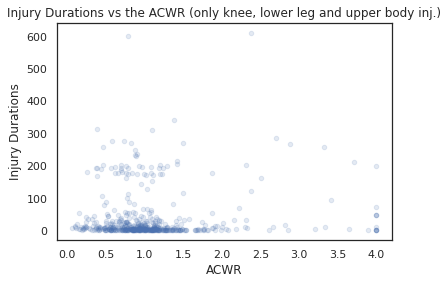

In [ ]:
df_onlykneesLLandUB = df[df['Injury Part'].isin(['knee','lower leg', 'upper body'])]
df_onlykneesLLandUB = df_onlykneesLLandUB.reset_index(drop=True)

scatter_acwr = df_onlykneesLLandUB.plot(x = 'Acute-Chronic Workload Ratio', y = 'Injury Duration',kind='scatter', alpha=0.15)
scatter_acwr.set_title('Injury Durations vs the ACWR (only knee, lower leg and upper body inj.)')
scatter_acwr.set_xlabel('ACWR')
scatter_acwr.set_ylabel('Injury Durations')

print(df_onlykneesLLandUB['Acute-Chronic Workload Ratio'].corr(df_onlykneesLLandUB['Injury Duration']))

Text(0.5, 1.0, 'Average ACWRs of each body part')

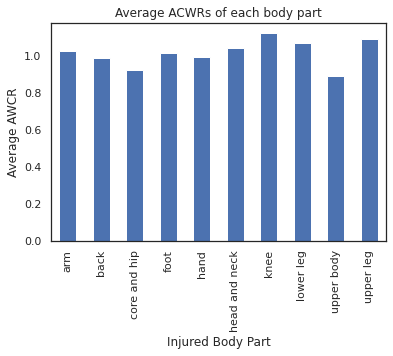

In [ ]:
df_copy = df.copy()
df_copy = df_copy.groupby(['Injury Part'])['Acute-Chronic Workload Ratio'].mean()
inj_partxacwr_plot = df_copy.plot(kind='bar')
inj_partxacwr_plot.set_xlabel('Injured Body Part')
inj_partxacwr_plot.set_ylabel('Average AWCR')
inj_partxacwr_plot.set_title('Average ACWRs of each body part')

range
(0.0, 0.5]    196
(0.5, 1]      803
(1, 1.5]      569
(1.5, 4]      192
dtype: int64


Text(0.5, 1.0, 'Number of Injuries vs Range of ACWR')

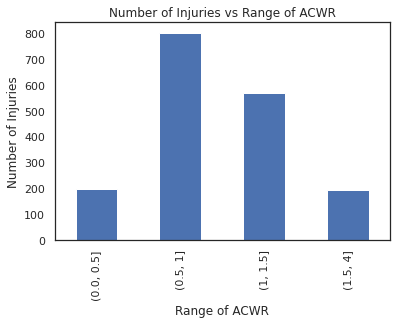

In [ ]:
def get_range(row):
  awcr = row['Acute-Chronic Workload Ratio']
  mask1 = awcr<=0.5
  mask2 = awcr <=1
  mask3 = awcr <= 1.5
  mask4 = awcr>1.5
  if mask1:
    return '(0.0, 0.5]'
  elif (not mask1) and mask2:
    return '(0.5, 1]'
  elif (not mask2) and mask3:
    return '(1, 1.5]'
  elif mask4:
    return '(1.5, 4]'
df_copy = df.copy()
df_copy['range'] = df_copy.apply(lambda ro: get_range(ro), axis=1)
awcr_grouped = df_copy.groupby(['range']).size()
print(awcr_grouped)
awcr_grouped_plot = awcr_grouped.plot(kind='bar')
awcr_grouped_plot.set_xlabel('Range of ACWR')
awcr_grouped_plot.set_ylabel('Number of Injuries')
awcr_grouped_plot.set_title('Number of Injuries vs Range of ACWR')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         InjuryDuration   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.751
Date:                Wed, 23 Jun 2021   Prob (F-statistic):             0.0529
Time:                        16:07:32   Log-Likelihood:                -9842.1
No. Observations:                1760   AIC:                         1.969e+04
Df Residuals:                    1758   BIC:                         1.970e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.8427      2.972      8.358      0.000      19.013      30.672
ACWR           4.7294      2.442      1.937      0.053      -0.060       9.519
==============================================================================
Omnibus:                     1506.518   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41384.225
Skew:                           3.986   Prob(JB):                         0.00
Kurtosis:                      25.378   Cond. No.                         3.64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

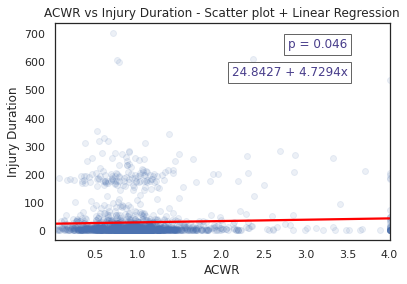

In [ ]:
#### now only focusing on the counts
df_copy = df.copy()

df['ACWR'] = df['Acute-Chronic Workload Ratio']
df['InjuryDuration'] = df['Injury Duration']
df['z-score'] = (df['Injury Duration'] - df['Injury Duration'].mean()) / (df['Injury Duration'].std())


sns.set(style="white")
reg_plot_body = sns.regplot(x='Acute-Chronic Workload Ratio',y='Injury Duration',data=df,fit_reg=True, scatter_kws={'alpha':0.1},line_kws = {'color':'red'},ci=None)
reg_plot_body.set(xlabel='''ACWR''', ylabel='Injury Duration',title='''ACWR vs Injury Duration - Scatter plot + Linear Regression''')
corr_coef = 'p = {}'.format(((stats.pearsonr(df['Acute-Chronic Workload Ratio'],df['Injury Duration'])[0]).round(3)))
regression_func = '24.8427 + 4.7294x'
df['injuredbodypartcount'] = df['injured body part count']
df['InjuryDuration'] = df['Injury Duration']
df['Totalnumofinj'] = df['Total num. of inj']
reg_plot_body.text(3.5,650,corr_coef,horizontalalignment='right', size='medium', color='darkslateblue', weight='normal',bbox=dict(facecolor='white',ec='black', alpha=0.6))
reg_plot_body.text(3.5,550,regression_func,horizontalalignment='right', size='medium', color='darkslateblue', weight='normal',bbox=dict(facecolor='white',ec='black', alpha=0.6))

model = sm.OLS.from_formula("InjuryDuration ~ ACWR", data=df)
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         InjuryDuration   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.820
Date:                Wed, 23 Jun 2021   Prob (F-statistic):             0.0937
Time:                        17:05:38   Log-Likelihood:                -3020.3
No. Observations:                 528   AIC:                             6045.
Df Residuals:                     526   BIC:                             6053.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.2363      5.986      4.884      0.000      17.477      40.995
ACWR           7.8630      4.682      1.679      0.094      -1.336      17.062
==============================================================================
Omnibus:                      397.510   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5576.274
Skew:                           3.268   Prob(JB):                         0.00
Kurtosis:                      17.518   Cond. No.                         3.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

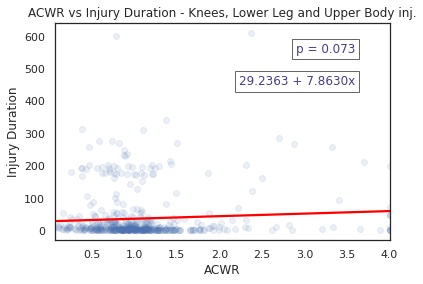

In [ ]:
df_onlykneesLLandUB['ACWR'] = df_onlykneesLLandUB['Acute-Chronic Workload Ratio']
df_onlykneesLLandUB['InjuryDuration'] = df_onlykneesLLandUB['Injury Duration']
df_onlykneesLLandUB['z-score'] = (df_onlykneesLLandUB['Injury Duration'] - df_onlykneesLLandUB['Injury Duration'].mean()) / (df_onlykneesLLandUB['Injury Duration'].std())
sns.set(style="white")
reg_plot_body = sns.regplot(x='Acute-Chronic Workload Ratio',y='Injury Duration',data=df_onlykneesLLandUB,fit_reg=True, scatter_kws={'alpha':0.1},line_kws = {'color':'red'},ci=None)
reg_plot_body.set(xlabel='''ACWR''', ylabel='Injury Duration',title='''ACWR vs Injury Duration - Knees, Lower Leg and Upper Body inj.''')
corr_coef = 'p = {}'.format(((stats.pearsonr(df_onlykneesLLandUB['Acute-Chronic Workload Ratio'],df_onlykneesLLandUB['Injury Duration'])[0]).round(3)))
regression_func = '29.2363 + 7.8630x'
reg_plot_body.text(3.6,550,corr_coef,horizontalalignment='right', size='medium', color='darkslateblue', weight='normal',bbox=dict(facecolor='white',ec='black', alpha=0.6))
reg_plot_body.text(3.6,450,regression_func,horizontalalignment='right', size='medium', color='darkslateblue', weight='normal',bbox=dict(facecolor='white',ec='black', alpha=0.6))

model = sm.OLS.from_formula("InjuryDuration ~ ACWR", data=df_onlykneesLLandUB)
result = model.fit()
result.summary()
